In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os.path as Path

In [3]:
# Unzip files
def unzip_files(file):
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()
    
unzip_files("test_HujdGe7.zip")
unzip_files("train_oSwQCTC.zip")

In [18]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [32]:
print("Train Rows: " + str(train.shape[0]) + " Train Columns: " + str(train.shape[1]))
print("Test Rows: " + str(test.shape[0]) + " Test Columns: " + str(test.shape[1]))

Train Rows: 550068 Train Columns: 12
Test Rows: 233599 Test Columns: 11


In [33]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [35]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [36]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [85]:
# Distribution of transactions by user
users_transactions = train.groupby(by = "User_ID", as_index = False)["Occupation"].count().rename(columns={"Occupation": "count_transactions"})
users_spend = train.groupby(by = "User_ID", as_index = False)["Purchase"].sum()
users_transactions['Purchase'] = users_spend.Purchase

In [95]:
print(users_transactions.describe())
print("There is a total of " + str(len(users_transactions)) + " customers.")

            User_ID  count_transactions      Purchase
count  5.891000e+03         5891.000000  5.891000e+03
mean   1.003025e+06           93.374300  8.650166e+05
std    1.743379e+03          107.190049  9.436445e+05
min    1.000001e+06            6.000000  4.668100e+04
25%    1.001518e+06           26.000000  2.376780e+05
50%    1.003026e+06           54.000000  5.212130e+05
75%    1.004532e+06          117.000000  1.119250e+06
max    1.006040e+06         1026.000000  1.053691e+07
There is a total of 5891 customers.


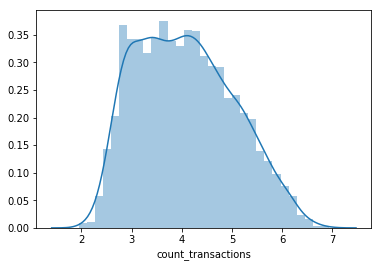

In [82]:
sns.distplot(np.log(users_transactions.count_transactions + 1))

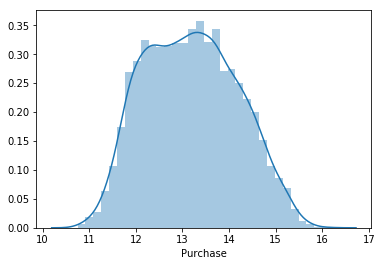

In [87]:
sns.distplot(np.log(users_transactions.Purchase+1))

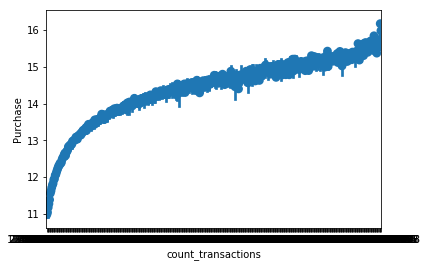

In [90]:
sns.pointplot(x = np.log(users_transactions.count_transactions + 1),
              y = np.log(users_transactions.Purchase + 1))

In [117]:
product_total_purchases = train.groupby(by = 'Product_ID', as_index = False)['Occupation'].count().rename(columns={"Occupation": "count_transactions"})
product_min_price = train.groupby(by = 'Product_ID', as_index = False)['Purchase'].min()
product_max_price = train.groupby(by = 'Product_ID', as_index = False)['Purchase'].max()

product_total_purchases['Min_Price'] = product_min_price['Purchase']
product_total_purchases['Max_Price'] = product_max_price['Purchase']
product_total_purchases['Price_Diff'] = product_max_price['Purchase'] - product_min_price['Purchase']

In [118]:
product_total_purchases.describe()

,count_transactions,Min_Price,Max_Price,Price_Diff
count,3631.000000,3631.000000,3631.000000,3631.000000
mean,151.492151,3074.830350,11520.082897,8445.252548
std,212.852932,2180.781681,5308.822488,4551.805866
min,1.000000,12.000000,62.000000,0.000000
25%,19.500000,1762.000000,8766.000000,6052.000000
50%,71.000000,2099.000000,9990.000000,7189.000000
75%,194.000000,3888.000000,16345.500000,11592.000000
max,1880.000000,20323.000000,23961.000000,19334.000000


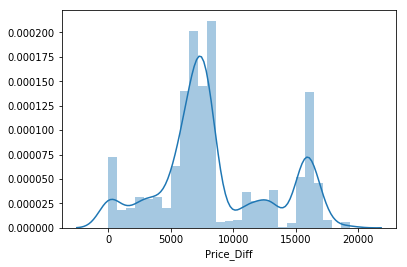

In [122]:
sns.distplot(product_total_purchases.Price_Diff)

In [114]:
# Do Customers repeat purchases of particular items?  Nope

customer_repeat = train.groupby(by = ["User_ID", "Product_ID"],
                                as_index = False)["Occupation"].count().rename(columns={"Occupation": "count_transactions"})